In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# loading the raw data from the Sklearn 

In [13]:
from sklearn.datasets import load_breast_cancer

In [22]:
data = load_breast_cancer()



In [23]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [24]:
cancer = pd.DataFrame(data=data['data'],columns=data['feature_names'])


In [25]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
# Checking Null Values 

In [26]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# Splitting data into training and testing 

In [27]:
X = cancer
Y = data['target']

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

# Applying Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

In [30]:
logistic_model.fit(X_train,Y_train)

C:\Users\canpa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
predictions = logistic_model.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(predictions,Y_test))

[[39  3]
 [ 3 69]]


In [34]:
print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



# Demensionality Reduction using PCA

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA(n_components=2)

In [38]:
pca.fit(cancer)

PCA(n_components=2)

In [39]:
arr = pca.transform(cancer)

In [40]:
pca_data = pd.DataFrame(arr,columns=['PC 1','PC 2'])

In [41]:
pca_data.head()

,PC 1,PC 2
0,1160.142574,-293.917544
1,1269.122443,15.630182
2,995.793889,39.156743
3,-407.180803,-67.380320
4,930.341180,189.340742


# Spliting the data into Training and Testing

In [42]:


X = pca_data
Y = data['target']



In [43]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

# Applying Logistic Regression on PCA data

In [45]:
logistic_model.fit(X_train,Y_train)

LogisticRegression()

In [46]:
predictions = logistic_model.predict(X_test)

In [47]:


from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(predictions,Y_test))



              precision    recall  f1-score   support

           0       0.88      0.95      0.91        39
           1       0.97      0.93      0.95        75

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



# Ploting The Separation Of The Data Done By PCA

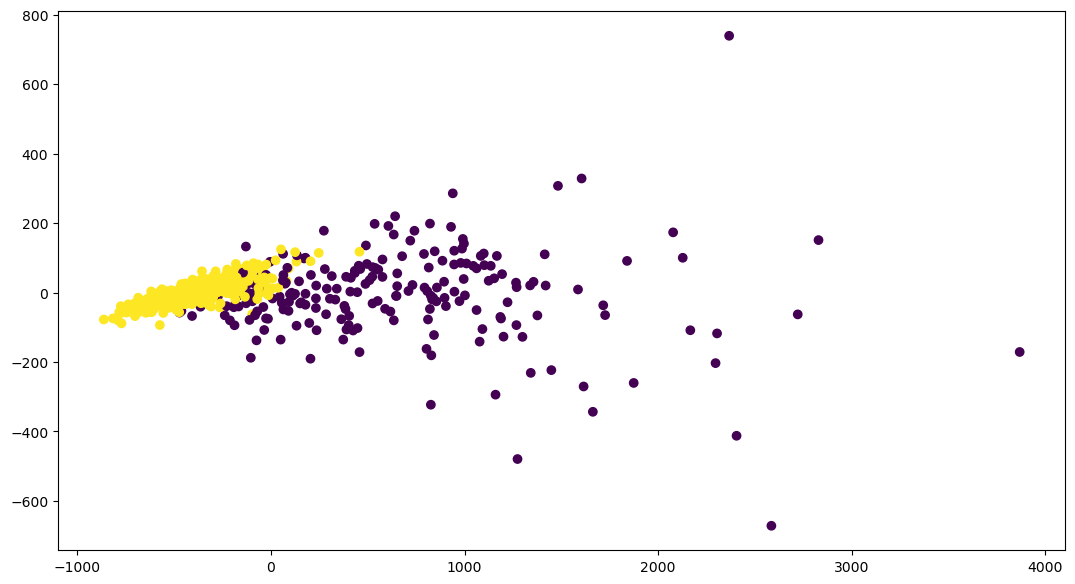

In [48]:
plt.figure(figsize=(13,7))
plt.scatter(pca_data['PC 1'],pca_data['PC 2'],c=data['target'])
plt.show()